In [5]:
import cv2
import matplotlib.pyplot as plt

In [18]:
cvpath='D:/세미 2차 이미지 처리/covid19_mask_detection/샘플 코드/Opencv_assets/'
face_cascade = cv2.CascadeClassifier('haarcascade_frontface.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

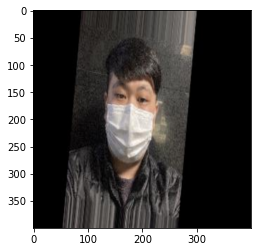

In [61]:
img=cv2.imread('img_aug/full_0_8925.jpg')
img2=cv2.resize(img,(400,400))
plt.imshow(img2[:,:,::-1])

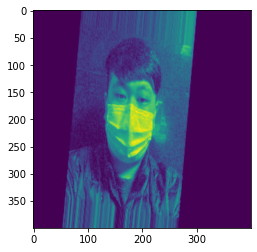

In [62]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [63]:
faces = face_cascade.detectMultiScale(gray) #사진정보,정밀도,얼굴 사이의 최소간격
for (x,y,w,h) in faces:
    cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2) #cv2.rectangle(img, start, end, color, thickness)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img2[y:y+h, x:x+w]
    eyes =eye_cascade.detectMultiScale(roi_gray,1.1,4)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

1


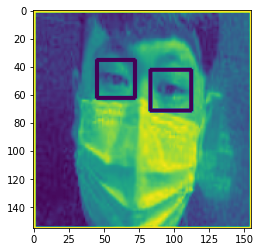

In [64]:
plt.imshow(roi_gray)

In [65]:
eyes

array([[45, 35, 27, 27],
       [83, 42, 29, 29]], dtype=int32)

In [66]:
eye_1=eyes[0]
eye_2=eyes[1]

if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1

In [67]:
# Calculating coordinates of a central points of the rectangles
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0] 
left_eye_y = left_eye_center[1]
 
right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]
 
cv2.circle(roi_gray, left_eye_center, 5, (255, 0, 0) , -1)
cv2.circle(roi_gray, right_eye_center, 5, (255, 0, 0) , -1)
cv2.line(roi_gray,right_eye_center, left_eye_center,(0,200,200),3)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255,  41, ...,  86,  79, 255],
       ...,
       [255, 255,  33, ...,  61,  66, 255],
       [255, 255,  20, ...,  70,  73, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [68]:
if left_eye_y > right_eye_y:
    A = (right_eye_x, left_eye_y)
   # Integer -1 indicates that the image will rotate in the clockwise direction
    direction = -1 
else:
    A = (left_eye_x, right_eye_y)
  # Integer 1 indicates that image will rotate in the counter clockwise  
  # direction
    direction = 1 

cv2.circle(roi_gray, A, 5, (255, 0, 0) , -1)
 
cv2.line(roi_gray,right_eye_center, left_eye_center,(0,200,200),3)
cv2.line(roi_gray,left_eye_center, A,(0,200,200),3)
cv2.line(roi_gray,right_eye_center, A,(0,200,200),3)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255,  41, ...,  86,  79, 255],
       ...,
       [255, 255,  33, ...,  61,  66, 255],
       [255, 255,  20, ...,  70,  73, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [51]:
import numpy as np

In [69]:
delta_x = right_eye_x - left_eye_x
delta_y = right_eye_y - left_eye_y
angle=np.arctan(delta_y/delta_x)
angle = (angle * 180) / np.pi

In [70]:
# Width and height of the image
h, w = img2.shape[:2]
# Calculating a center point of the image
# Integer division "//"" ensures that we receive whole numbers
center = (w // 2, h // 2)
# Defining a matrix M and calling
# cv2.getRotationMatrix2D method
M = cv2.getRotationMatrix2D(center, (angle), 1.0)
# Applying the rotation to our image using the
# cv2.warpAffine method
rotated1 = cv2.warpAffine(img2, M, (w, h))
rotated = cv2.warpAffine(gray, M, (w, h))

In [81]:
M

array([[  0.9796027 ,   0.20094414, -36.10936887],
       [ -0.20094414,   0.9796027 ,  44.26828862]])

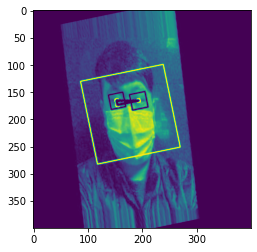

In [71]:
plt.imshow(rotated)

In [31]:
faces = face_cascade.detectMultiScale(rotated, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(rotated,(x,y),(x+w,y+h),(255,0,0),2) #cv2.rectangle(img, start, end, color, thickness)
    roi_gray = rotated[y:y+h, x:x+w]
    roi_color = rotated1[y:y+h, x:x+w]

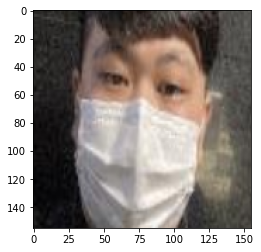

In [32]:
plt.imshow(roi_color[:,:,::-1])

In [58]:
#rotated =cv2.resize(rotated,(400,400))
#gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(rotated) #사진정보,정밀도,얼굴 사이의 최소간격
for (x,y,w,h) in faces:
    cv2.rectangle(rotated,(x,y),(x+w,y+h),(255,0,0),2) #cv2.rectangle(img, start, end, color, thickness)
    roi_gray = rotated[y:y+h, x:x+w]
    eyes =eye_cascade.detectMultiScale(roi_gray,1.1,4)

eyes

array([[45, 35, 27, 27],
       [83, 42, 29, 29]], dtype=int32)

In [78]:
faces = face_cascade.detectMultiScale(rotated)
faces

()

In [34]:
roi_color.shape

(155, 155, 3)

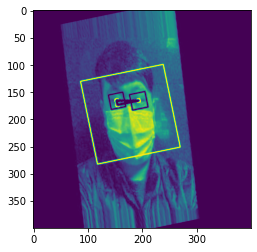

In [56]:
plt.imshow(rotated)

In [60]:
rotated.shape

(400, 400)

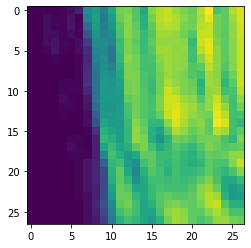

In [59]:
a,b,c,d = eyes[0]
plt.imshow(rotated[b:b+d,a:a+c])

In [ ]:
cropped_img = img[y: y + h, x: x + w]



# 참고링크
- [얼굴 정렬하기](http://datahacker.rs/010-how-to-align-faces-with-opencv-in-python/)   
- [이미지 자르기](https://076923.github.io/posts/Python-opencv-9/)  
- [회전 행렬](https://dsbook.tistory.com/184?category=802614)  
- [회전 행렬](https://076923.github.io/posts/C-opencv4-20/)  
- [회전 행렬](https://stackoverrun.com/ko/q/11651206)  
- [회전 행렬](https://jangjy.tistory.com/267)  